In [1]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.enable_eager_execution()

from google.colab import drive
drive.mount('/content/drive/')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import h5py
import numpy as np

f1 = h5py.File("/content/drive/My Drive/iPYTHON TF/03.02.2020/SVHN_single_grey1.h5", 'r')

print(list(f1.keys()))

train_X = f1['X_train']
train_y = f1['y_train']

val_X = f1['X_val']
val_y = f1['y_val']

test_X = f1['X_test']
test_y = f1['y_test']


print ()
print (np.array(train_X.value).shape)
print (np.array(train_y.value).shape)

print ()
print (np.array(val_X.value).shape)
print (np.array(val_y.value).shape)

print ()
print (np.array(test_X.value).shape)
print (np.array(test_y.value).shape)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

(42000, 32, 32)
(42000,)

(60000, 32, 32)
(60000,)

(18000, 32, 32)
(18000,)


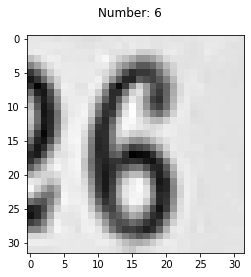

In [3]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0, test_X.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(test_X[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(test_y[img_num]))
plt.show()

In [4]:
#train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
#val_y = tf.keras.utils.to_categorical(val_y, num_classes=10)
#test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model1.add(tf.keras.layers.BatchNormalization())

#Hidden layers
model1.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
#normalize data
model1.add(tf.keras.layers.BatchNormalization())


model1.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
#normalize data
model1.add(tf.keras.layers.BatchNormalization())


#Dropout layer
model1.add(tf.keras.layers.Dropout(0.3))

#Hidden layers
model1.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
#normalize data
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))
#normalize data
model1.add(tf.keras.layers.BatchNormalization())


#Dropout layer
model1.add(tf.keras.layers.Dropout(0.3))

#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [5]:
#Train the model
model1.fit(train_X,train_y,          
          validation_data=(np.array(val_X),val_y),
          epochs=33,
          batch_size=32,
          shuffle="batch"
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 42000 samples, validate on 60000 samples
Epoch 1/33
42000/42000 [==============================] - 17s 403us/sample - loss: 2.0380 - acc: 0.2963 - val_loss: 1.3410 - val_acc: 0.5597
Epoch 2/33
42000/42000 [==============================] - 16s 370us/sample - loss: 1.4620 - acc: 0.5215 - val_loss: 1.0369 - val_acc: 0.6761
Epoch 3/33
42000/42000 [==============================] - 15s 365us/sample - loss: 1.2682 - acc: 0.6017 - val_loss: 0.8822 - val_acc: 0.7279
Epoch 4/33
42000/42000 [==============================] - 15s 367us/sample - loss: 1.1487 - acc: 0.6415 - val_loss: 0.7833 - val_acc: 0.7566
Epoch 5/33
42000/42000 [==============================] - 15s 365us/sample - loss: 1.0664 - acc: 0.6702 - val_loss: 0.7348 - val_acc: 0.7717
Epoch 6/33
42000/42000 [==============================] - 15s 355us/sample - loss: 0.9913 - acc: 0.6950 - val_loss: 0.6912 - val_acc: 0.7874
Epoch 7/33

In [6]:
#More training the model

model1.fit(train_X,train_y,          
          validation_data=(np.array(val_X),val_y),
          initial_epoch=33,
          epochs=66,
          batch_size=32,
          shuffle="batch"
          )



Train on 42000 samples, validate on 60000 samples
Epoch 34/66
42000/42000 [==============================] - 16s 377us/sample - loss: 0.5244 - acc: 0.8356 - val_loss: 0.3945 - val_acc: 0.8810
Epoch 35/66
42000/42000 [==============================] - 15s 368us/sample - loss: 0.5162 - acc: 0.8379 - val_loss: 0.3952 - val_acc: 0.8798
Epoch 36/66
42000/42000 [==============================] - 16s 371us/sample - loss: 0.5111 - acc: 0.8382 - val_loss: 0.3879 - val_acc: 0.8815
Epoch 37/66
42000/42000 [==============================] - 16s 371us/sample - loss: 0.5023 - acc: 0.8427 - val_loss: 0.4007 - val_acc: 0.8770
Epoch 38/66
42000/42000 [==============================] - 16s 379us/sample - loss: 0.4930 - acc: 0.8447 - val_loss: 0.3946 - val_acc: 0.8783
Epoch 39/66
42000/42000 [==============================] - 16s 386us/sample - loss: 0.4900 - acc: 0.8457 - val_loss: 0.3855 - val_acc: 0.8831
Epoch 40/66
42000/42000 [==============================] - 16s 370us/sample - loss: 0.4898 - acc: 

In [7]:
#More training the model

model1.fit(train_X,train_y,          
          validation_data=(np.array(val_X),val_y),
          initial_epoch=66,
          epochs=100,
          batch_size=32,
          shuffle="batch"
          )

Train on 42000 samples, validate on 60000 samples
Epoch 67/100
42000/42000 [==============================] - 15s 353us/sample - loss: 0.3842 - acc: 0.8772 - val_loss: 0.3597 - val_acc: 0.8921
Epoch 68/100
42000/42000 [==============================] - 15s 352us/sample - loss: 0.3786 - acc: 0.8795 - val_loss: 0.3609 - val_acc: 0.8919
Epoch 69/100
42000/42000 [==============================] - 15s 357us/sample - loss: 0.3780 - acc: 0.8780 - val_loss: 0.3552 - val_acc: 0.8937
Epoch 70/100
42000/42000 [==============================] - 15s 352us/sample - loss: 0.3749 - acc: 0.8800 - val_loss: 0.3531 - val_acc: 0.8952
Epoch 71/100
42000/42000 [==============================] - 15s 348us/sample - loss: 0.3748 - acc: 0.8789 - val_loss: 0.3564 - val_acc: 0.8926
Epoch 72/100
42000/42000 [==============================] - 15s 354us/sample - loss: 0.3740 - acc: 0.8801 - val_loss: 0.3515 - val_acc: 0.8958
Epoch 73/100
42000/42000 [==============================] - 15s 358us/sample - loss: 0.3644 

In [8]:
model1.evaluate(test_X, test_y, batch_size=32, verbose=0)

[0.5425199247135056, 0.85566664]

In [0]:
y_pred=model1.predict(np.array(test_X))

In [10]:
out1 = []
for val in y_pred:
    out1.append(np.argmax(val))
print(out1)


from sklearn import metrics
classification_report=metrics.classification_report(test_y,out1)
print(classification_report)

[1, 2, 2, 9, 0, 9, 1, 5, 1, 4, 6, 5, 1, 4, 3, 5, 8, 6, 5, 5, 0, 6, 5, 6, 3, 2, 6, 7, 9, 5, 2, 8, 9, 1, 0, 9, 5, 3, 3, 7, 0, 4, 2, 4, 9, 5, 7, 8, 8, 3, 5, 3, 7, 1, 4, 8, 1, 4, 0, 9, 0, 1, 5, 9, 9, 2, 2, 2, 6, 8, 9, 8, 3, 8, 4, 5, 2, 8, 6, 4, 5, 4, 2, 8, 2, 6, 0, 9, 9, 5, 3, 2, 7, 5, 0, 7, 6, 4, 8, 7, 7, 7, 5, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 8, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 6, 3, 9, 6, 1, 6, 6, 7, 9, 4, 9, 6, 3, 5, 4, 0, 2, 9, 5, 5, 0, 0, 0, 9, 8, 5, 8, 8, 9, 3, 6, 8, 4, 0, 7, 0, 0, 1, 5, 9, 2, 7, 6, 7, 1, 5, 2, 9, 0, 4, 5, 0, 5, 5, 5, 7, 2, 4, 6, 1, 6, 0, 3, 6, 9, 6, 8, 4, 9, 5, 2, 7, 8, 6, 5, 3, 5, 2, 9, 0, 2, 1, 8, 2, 8, 9, 5, 2, 0, 2, 9, 0, 2, 0, 9, 5, 1, 7, 7, 8, 9, 6, 0, 7, 3, 3, 8, 2, 3, 0, 5, 4, 7, 7, 3, 8, 7, 2, 3, 9, 0, 6, 4, 1, 3, 3, 1, 7, 1, 5, 7, 0, 0, 8, 2, 4, 6, 4, 9, 7, 7, 9, 3, 6, 2, 9, 1, 5, 0, 0, 7, 7, 0, 8, 9, 6, 3, 7, 7, 0, 6, 3, 2, 5, 2, 5, 4, 3, 0, 9, 1, 4, 5, 5, 5, 9, 7, 7, 3, 5, 1, 8, 9, 1, 4, 8, 6, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 9, 7, 1, 0, 7, 7, 0, 6, 3, 8, 